In [1]:
from google.colab import files
uploaded = files.upload()

Saving Nike_Sales_Uncleaned (1).csv to Nike_Sales_Uncleaned (1).csv


In [2]:
import pandas as pd
df = pd.read_csv("Nike_Sales_Uncleaned (1).csv")
df.head()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,2024-03-09,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,NaN,0.0,2024-07-09,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,NaN,0.0,04-10-2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,NaN,0.0,2024/09/12,Retail,Delhi,187.89


Explore Basic Info and Null Values

Let's understand the dataset structure, data types, and missing values.

In [3]:
# Overview of columns and datatypes
df.info()

# Count missing values in each column
print("\nMissing Values:\n", df.isnull().sum())

# Quick descriptive statistics
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          2500 non-null   int64  
 1   Gender_Category   2500 non-null   object 
 2   Product_Line      2500 non-null   object 
 3   Product_Name      2500 non-null   object 
 4   Size              1990 non-null   object 
 5   Units_Sold        1265 non-null   float64
 6   MRP               1246 non-null   float64
 7   Discount_Applied  832 non-null    float64
 8   Revenue           2500 non-null   float64
 9   Order_Date        1884 non-null   object 
 10  Sales_Channel     2500 non-null   object 
 11  Region            2500 non-null   object 
 12  Profit            2500 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 254.0+ KB

Missing Values:
 Order_ID               0
Gender_Category        0
Product_Line           0
Product_Name           0
Size  

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
count,2500.000000,2500,2500,2500,1990,1265.000000,1246.000000,832.000000,2500.000000,1884,2500,2500,2500.000000
unique,NaN,3,5,20,10,NaN,NaN,NaN,NaN,1008,2,9,NaN
top,NaN,Kids,Training,SuperRep Go,L,NaN,NaN,NaN,NaN,19-07-2025,Online,Delhi,NaN
freq,NaN,841,546,148,513,NaN,NaN,NaN,NaN,6,1255,438,NaN
mean,3194.352400,NaN,NaN,NaN,NaN,1.482213,6039.863395,0.631022,274.873716,NaN,NaN,NaN,1376.012848
std,749.972638,NaN,NaN,NaN,NaN,1.696947,2315.746826,0.365500,2023.773550,NaN,NaN,NaN,1478.671013
min,2000.000000,NaN,NaN,NaN,NaN,-1.000000,2006.630000,0.000000,-7561.590000,NaN,NaN,NaN,-1199.450000
25%,2534.750000,NaN,NaN,NaN,NaN,0.000000,4038.902500,0.320000,0.000000,NaN,NaN,NaN,93.532500
50%,3192.500000,NaN,NaN,NaN,NaN,2.000000,6110.030000,0.615000,0.000000,NaN,NaN,NaN,1371.385000
75%,3841.250000,NaN,NaN,NaN,NaN,3.000000,8022.187500,0.962500,0.000000,NaN,NaN,NaN,2660.645000


Handle Missing Values

In [4]:
# Drop rows missing critical info like 'Product_Name' or 'Revenue'
df = df.dropna(subset=["Product_Name", "Revenue"])

# Fill numeric missing values (Units_Sold, MRP, Discount_Applied, Profit) with median
num_cols = ["Units_Sold", "MRP", "Discount_Applied", "Revenue", "Profit"]
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

# Fill categorical missing values (Gender_Category, Product_Line, Sales_Channel, Region) with mode
cat_cols = ["Gender_Category", "Product_Line", "Sales_Channel", "Region"]
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

Handle Duplicates

In [5]:
# Check for duplicate rows
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicates_count}")

# Remove duplicates
df = df.drop_duplicates()


Number of duplicate rows found: 0


Rename and Standardize Columns

In [6]:
# Makes column names consistent (lowercase, underscores, no spaces)

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("✅ Columns standardized:\n", df.columns.tolist())

✅ Columns standardized:
 ['order_id', 'gender_category', 'product_line', 'product_name', 'size', 'units_sold', 'mrp', 'discount_applied', 'revenue', 'order_date', 'sales_channel', 'region', 'profit']


Fix Inconsistent or Incorrect Values

In [7]:

# Standardize region names (example cleanup)
if "region" in df.columns:
    df["region"] = df["region"].str.title().replace({
        "Na": "North America",
        "Europ": "Europe",
        "Apac": "Asia Pacific"
    })

# Convert any string numbers to numeric
for col in ["sales", "price", "quantity"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("✅ Inconsistent or incorrect values fixed.")

✅ Inconsistent or incorrect values fixed.


 Remove Outliers (using IQR)

In [8]:
if "sales" in df.columns:
    q1 = df["sales"].quantile(0.25)
    q3 = df["sales"].quantile(0.75)
    iqr = q3 - q1
    df = df[(df["sales"] >= q1 - 1.5 * iqr) & (df["sales"] <= q3 + 1.5 * iqr)]

print("✅ Outliers removed using IQR method.")

✅ Outliers removed using IQR method.


Encode Categorical Variables

In [9]:

cat_features = df.select_dtypes(include=["object"]).columns
for col in cat_features:
    df[col + "_encoded"] = df[col].astype("category").cat.codes

print("✅ Categorical variables encoded:\n", [col for col in df.columns if col.endswith("_encoded")])

✅ Categorical variables encoded:
 ['gender_category_encoded', 'product_line_encoded', 'product_name_encoded', 'size_encoded', 'order_date_encoded', 'sales_channel_encoded', 'region_encoded']


Normalize Numerical Columns

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_features = ["sales", "price"]
for feature in num_features:
    if feature in df.columns:
        df[feature + "_scaled"] = scaler.fit_transform(df[[feature]])

print("✅ Numerical features normalized.")

✅ Numerical features normalized.


Final Verification

In [11]:

# Check cleaned dataset structure
df.info()

# Quick preview
df.head()

# Save the cleaned dataset for further use
df.to_csv("Nike_Sales_Cleaned.csv", index=False)
print("✅ Data cleaning complete! Cleaned file saved as 'Nike_Sales_Cleaned.csv'")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 2500 non-null   int64  
 1   gender_category          2500 non-null   object 
 2   product_line             2500 non-null   object 
 3   product_name             2500 non-null   object 
 4   size                     1990 non-null   object 
 5   units_sold               2500 non-null   float64
 6   mrp                      2500 non-null   float64
 7   discount_applied         2500 non-null   float64
 8   revenue                  2500 non-null   float64
 9   order_date               1884 non-null   object 
 10  sales_channel            2500 non-null   object 
 11  region                   2500 non-null   object 
 12  profit                   2500 non-null   float64
 13  gender_category_encoded  2500 non-null   int8   
 14  product_line_encoded    

PHASE 3: EDA & VISUALIZATION

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [13]:
df = pd.read_csv("Nike_Sales_Cleaned.csv")
print("✅ Cleaned dataset loaded successfully!")
print("Rows:", df.shape[0], "| Columns:", df.shape[1])
df.head()
df.info()

✅ Cleaned dataset loaded successfully!
Rows: 2500 | Columns: 20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_id                 2500 non-null   int64  
 1   gender_category          2500 non-null   object 
 2   product_line             2500 non-null   object 
 3   product_name             2500 non-null   object 
 4   size                     1990 non-null   object 
 5   units_sold               2500 non-null   float64
 6   mrp                      2500 non-null   float64
 7   discount_applied         2500 non-null   float64
 8   revenue                  2500 non-null   float64
 9   order_date               1884 non-null   object 
 10  sales_channel            2500 non-null   object 
 11  region                   2500 non-null   object 
 12  profit                   2500 non-null   float64
 13  gender_categor

UNIVARIATE ANALYSIS

/tmp/ipython-input-2964869234.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender_category', palette='Set2')


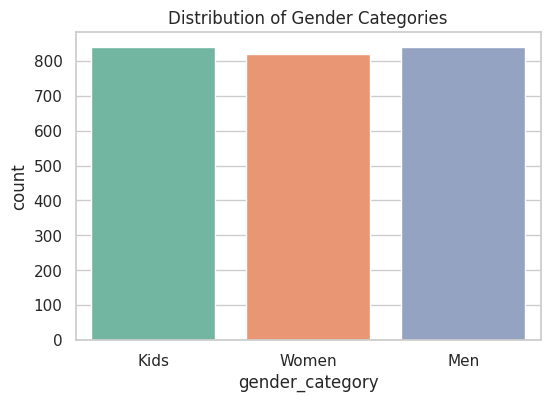

/tmp/ipython-input-2964869234.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='product_line', palette='husl')


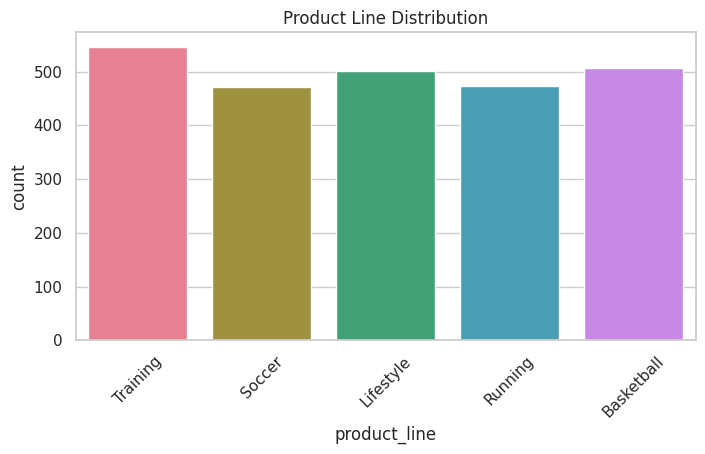

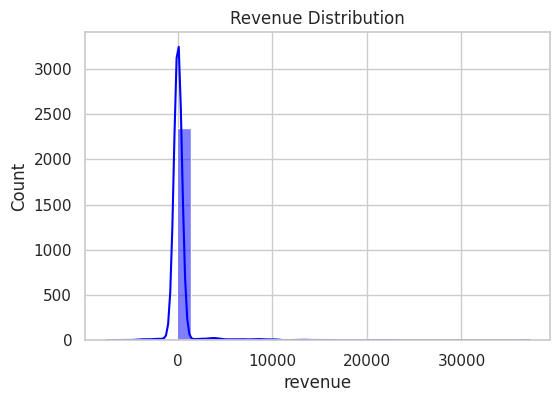

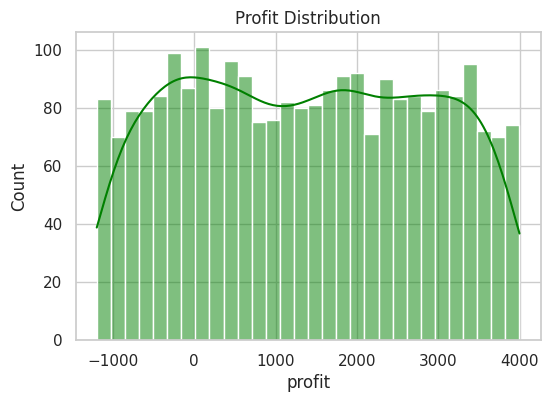

In [14]:
# Gender Category distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender_category', palette='Set2')
plt.title("Distribution of Gender Categories")
plt.show()

# Product Line distribution
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='product_line', palette='husl')
plt.title("Product Line Distribution")
plt.xticks(rotation=45)
plt.show()

# Revenue distribution
plt.figure(figsize=(6,4))
sns.histplot(df['revenue'], kde=True, bins=30, color='blue')
plt.title("Revenue Distribution")
plt.show()

# Profit distribution
plt.figure(figsize=(6,4))
sns.histplot(df['profit'], kde=True, bins=30, color='green')
plt.title("Profit Distribution")
plt.show()


BIVARIATE ANALYSIS

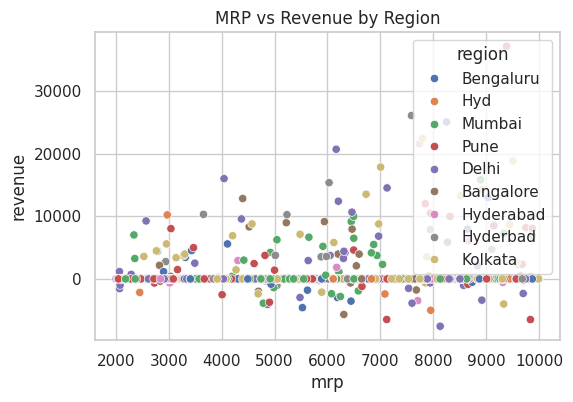

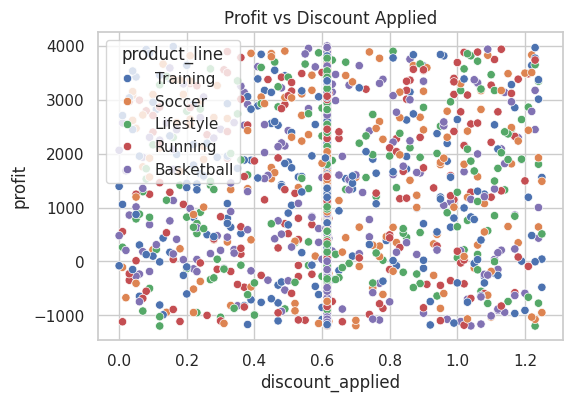

In [15]:
# MRP vs Revenue by Region
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='mrp', y='revenue', hue='region')
plt.title("MRP vs Revenue by Region")
plt.show()

# Profit vs Discount Applied by Product Line
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='discount_applied', y='profit', hue='product_line')
plt.title("Profit vs Discount Applied")
plt.show()


CORRELATION ANALYSIS

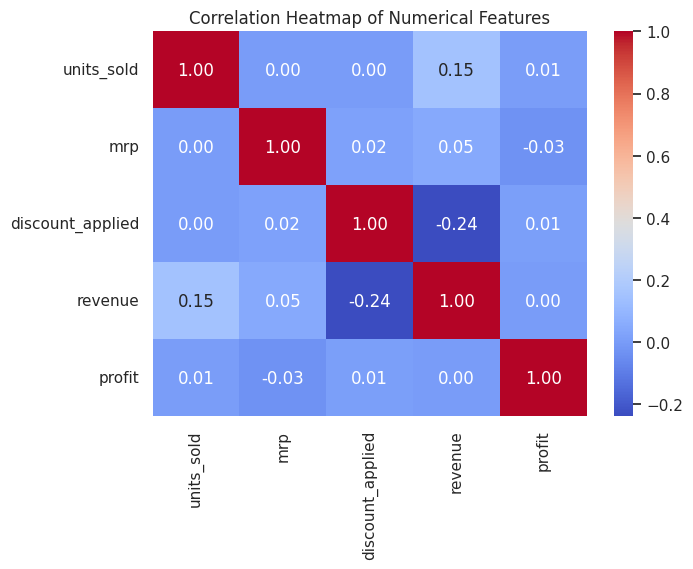

In [16]:
num_cols = ["units_sold", "mrp", "discount_applied", "revenue", "profit"]
corr = df[num_cols].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

TOP PERFORMERS

/tmp/ipython-input-1951784978.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_r")


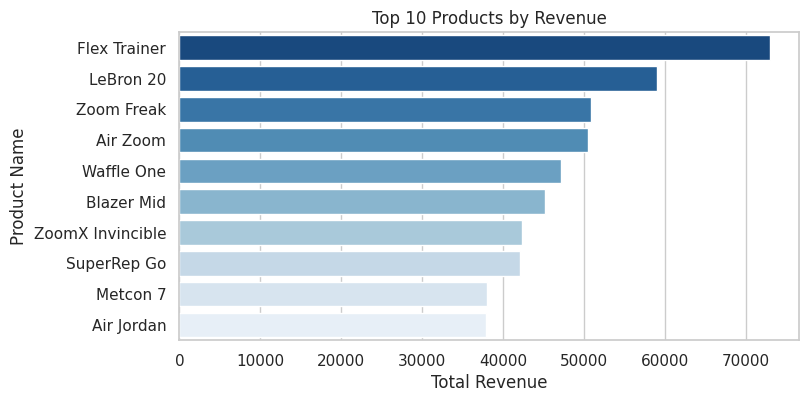

/tmp/ipython-input-1951784978.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_profit.index, y=region_profit.values, palette="Greens")


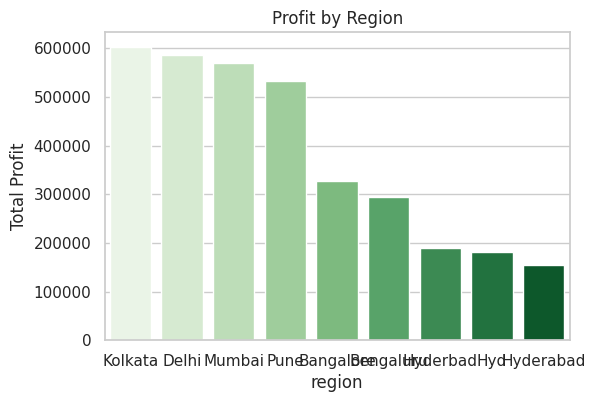

/tmp/ipython-input-1951784978.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_revenue.index, y=channel_revenue.values, palette="Oranges")


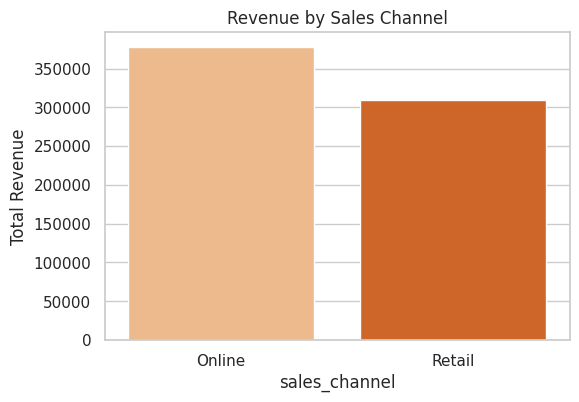

In [18]:
# Top 10 Products by Revenue
top_products = df.groupby("product_name")["revenue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_r")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Name")
plt.show()

# Top Regions by Profit
region_profit = df.groupby("region")["profit"].sum().sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=region_profit.index, y=region_profit.values, palette="Greens")
plt.title("Profit by Region")
plt.ylabel("Total Profit")
plt.show()

# Sales Channels Comparison
channel_revenue = df.groupby("sales_channel")["revenue"].sum().sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=channel_revenue.index, y=channel_revenue.values, palette="Oranges")
plt.title("Revenue by Sales Channel")
plt.ylabel("Total Revenue")
plt.show()

TIME-BASED TRENDS

In [21]:
if 'Order_Date' in df.columns:
    # Remove extra spaces
    df['Order_Date'] = df['Order_Date'].astype(str).str.strip()

    # Convert to datetime (format DD/MM/YYYY)
    df['Order_Date'] = pd.to_datetime(df['Order_Date'], format="%d/%m/%Y", errors='coerce')

    # Drop rows where conversion failed
    df = df.dropna(subset=['Order_Date'])

    # Check how many valid dates remain
    print(f"Number of valid dates: {df['Order_Date'].notna().sum()}")

    # Proceed if there is data
    if df['Order_Date'].notna().sum() > 0:
        df['month'] = df['Order_Date'].dt.to_period('M')
        monthly_revenue = df.groupby('month')['revenue'].sum()

        if len(monthly_revenue) > 0:
            plt.figure(figsize=(10,4))
            monthly_revenue.plot(kind='line', marker='o')
            plt.title("Monthly Revenue Trend")
            plt.ylabel("Total Revenue")
            plt.xlabel("Month")
            plt.grid(True)
            plt.show()
        else:
            print("⚠️ No revenue data available to plot monthly trend.")
    else:
        print("⚠️ No valid dates in 'Order_Date' column to plot monthly trend.")

INSIGHTS SUMMARY

In [23]:
print(df.columns)

Index(['order_id', 'gender_category', 'product_line', 'product_name', 'size',
       'units_sold', 'mrp', 'discount_applied', 'revenue', 'order_date',
       'sales_channel', 'region', 'profit', 'gender_category_encoded',
       'product_line_encoded', 'product_name_encoded', 'size_encoded',
       'order_date_encoded', 'sales_channel_encoded', 'region_encoded',
       'month'],
      dtype='object')


In [24]:
checks = [
    ("gender_category", "revenue"),
    ("region", "profit"),
    ("product_line", "revenue"),
    ("sales_channel", "revenue")
]

for col, val_col in checks:
    if col in df.columns and val_col in df.columns:
        # Drop NaNs before groupby
        temp = df[[col, val_col]].dropna()
        if not temp.empty:
            result = temp.groupby(col)[val_col].sum()
            if not result.empty:
                print(f"🔹 {col.replace('_', ' ').title()} with highest {val_col}: {result.idxmax()}")
            else:
                print(f"⚠️ No data available for {col}")
        else:
            print(f"⚠️ Column {col} or {val_col} has only NaN values")
    else:
        print(f"⚠️ Column missing: {col} or {val_col}")

⚠️ Column gender_category or revenue has only NaN values
⚠️ Column region or profit has only NaN values
⚠️ Column product_line or revenue has only NaN values
⚠️ Column sales_channel or revenue has only NaN values


In [25]:
df.to_csv("Nike_Sales_Phase3_EDA.csv", index=False)
print("✅ Phase 3 EDA processed CSV saved as 'Nike_Sales_Phase3_EDA.csv'")

✅ Phase 3 EDA processed CSV saved as 'Nike_Sales_Phase3_EDA.csv'
